### Mini Challenge - Plotting Actions
Sai

#### This Minichallege is a part of Mathematical Moddeling in soccer course taken by David sumpter

1, Think of a player who you enjoyed watching at the recent Men’s or Women’s World Cups.

2, What actions did they perform that were important and why?

3, Plot the actions and describe how the data supports or contradicts your own analysis.

4, Write a short text using at most two figures that illustrate your point.

### Eden Hazard against Brazil in the Quarter Finals of the Worldcup(2018) was one of the best individual perfomance of the tournament for me 

##### What made it so special for me was after Brazil scored a goal and made it 2-1 on the 75', I expected a brazil to go on an All out Attack and somehow score another by the looks of how they were playng 
##### But they were left frustrated.Hazard was unplayable in the last 15 mins and made life hard for the side lead by Tite

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import json
from mplsoccer.pitch import Pitch, add_image
%matplotlib inline  
pd.options.mode.chained_assignment = None
plt.style.use('ggplot')
#importing all the needed libraries

In [2]:
with open('open-data-master/data/matches/43/3.json') as m:
    m = json.load(m)
#Get the list of matches played in 2018 World Cup

In [3]:
count=0
for i in range(0,len(m)):
    if m[i]["home_team"]["home_team_name"]=="Belgium" or m[i]["away_team"]["away_team_name"]=="Belgium":
        count=count+1
print(count)

#Filter the matches Belgium played
#Belgium can play both home and away 
#Verifying if the filter is good 

7


In [4]:
for i in range(0,len(m)):
    if m[i]["home_team"]["home_team_name"]=="Belgium" or m[i]["away_team"]["away_team_name"]=="Belgium":
        print(m[i]["home_team"]["home_team_name"]+ " vs "+m[i]["away_team"]["away_team_name"]+" "+m[i]["match_date"] )
        
#Now checking if the teams and date are good 

Belgium vs Japan 2018-07-02
Belgium vs Panama 2018-06-18
Brazil vs Belgium 2018-07-06
Belgium vs Tunisia 2018-06-23
England vs Belgium 2018-06-28
France vs Belgium 2018-07-10
Belgium vs England 2018-07-14


In [5]:
m_id=[]
for i in range(0,len(m)):
    if m[i]["home_team"]["home_team_name"]=="Belgium" or m[i]["away_team"]["away_team_name"]=="Belgium":
        m_id.append(m[i]["match_id"])
#getting a list of match_ids that belgium played

In [6]:
#converting them to string so they are helpful when needed 
for i in range(0,len(m_id)):
    m_id[i]=str(m_id[i])

In [7]:
print(m_id)

['7584', '7536', '8650', '7552', '7570', '8655', '8657']


In [8]:
# goal here is to have a huge dataframe with all matches 
# json_normalize helps us convert a json file to dataframe 

df=pd.DataFrame()
for i in m_id:
    match=json.load(open("open-data-master/data/events/"+i+".json",encoding="utf8"))
    temp_df=pd.json_normalize(match).assign(match_id = int(i)) 
    df=pd.concat([df,temp_df],axis=0,)
    

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26220 entries, 0 to 4425
Columns: 121 entries, id to shot.redirect
dtypes: float64(33), int64(10), object(78)
memory usage: 24.4+ MB


In [10]:
#let us now concentrate on Brazil vs Belgium

In [11]:
brabel=df[df["match_id"]==8650]

In [12]:
#now getting Eden hazard specific events from the Brazil vs Belgium game 

In [13]:
haz=brabel[brabel["player.name"]=="Eden Hazard"]

In [14]:
haz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 39 to 3579
Columns: 121 entries, id to shot.redirect
dtypes: float64(33), int64(10), object(78)
memory usage: 190.6+ KB


In [15]:
haz["type.name"].value_counts()

Ball Receipt*     52
Carry             49
Pass              39
Pressure          20
Foul Won          11
Dribble            9
Ball Recovery      7
Foul Committed     4
Miscontrol         3
Dispossessed       3
Shot               2
Block              1
Name: type.name, dtype: int64

In [16]:
#checking the event frequency and instantly those 9 dribbles catches the eye

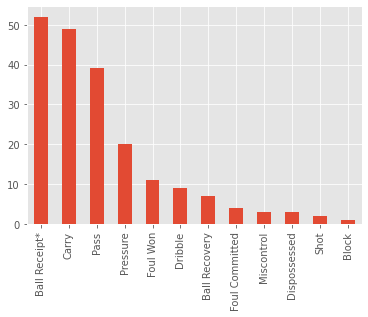

In [17]:
haz["type.name"].value_counts().plot(kind="bar")

In [18]:
# getting the event dribble and checking the number of dribbles completed 

In [19]:
len(haz[(haz["type.name"]=="Dribble") & (haz["dribble.outcome.name"]=="Complete")])

9

In [20]:
#Of the 9 attempted dribbles hazard had completed 9 dribbles which is quite an amazing thing 

##### From when i watched the game i thought hazard had a brilliant last 15 mins of the game (since brazil scored a goal and started to make a comeback)
##### let us now check this hypothesis using the data we have 

In [21]:
haz[(haz["type.name"]=="Foul Won") & (haz["minute"]> 75)]["minute"]

3243    84
3336    87
3388    89
3395    89
3520    92
Name: minute, dtype: int64

#### Hazard has won 5 fouls in the last 6 mins of the game disrupting brazils attack and gaining some valuable mins for the team and giving some really important breathers to players who were really tired at the end of the game 

In [22]:
#now let us check the locations where hazard was fouled

In [23]:
haz[(haz["type.name"]=="Foul Won") & (haz["minute"]> 75)]["location"]

3243    [70.0, 58.0]
3336    [77.0, 48.0]
3388    [34.0, 45.0]
3395    [56.0, 42.0]
3520    [83.0, 78.0]
Name: location, dtype: object

In [24]:
#the location attribute for the events is form of a list,it would be better
#if we would have a seoperate column in the dataframe so that we can work easily

### DOING THE SAME WID CARRYEND LOC AND PASSEND LOC

In [25]:
def xloc(x):
    return x[0]
haz["X_loc"]=haz["location"].apply(lambda x:xloc(x))


In [26]:
def ploc(x):
    if type(x)==list:
        return x[0]
    else:
        return np.nan
haz["pend_x"]=haz["pass.end_location"].apply(lambda x:ploc(x))

In [27]:
def cloc(x):
    if type(x)==list:
        return x[0]
    else:
        return np.nan
haz["cend_x"]=haz["carry.end_location"].apply(lambda x:cloc(x))

In [28]:
def ploc(x):
    if type(x)==list:
        return x[1]
    else:
        return np.nan
haz["pend_y"]=haz["pass.end_location"].apply(lambda x:ploc(x))

In [29]:
def cloc(x):
    if type(x)==list:
        return x[1]
    else:
        return np.nan
haz["cend_y"]=haz["carry.end_location"].apply(lambda x:cloc(x))

In [30]:
def yloc(x):
    return x[1]
haz["y_loc"]=haz["location"].apply(lambda x:yloc(x))

In [31]:
#creating a easier data frame to work with 

In [32]:
haz_foul=haz[(haz["type.name"]=="Foul Won") & (haz["minute"]> 75)][["X_loc","y_loc","minute","type.name"]]

In [33]:
haz_foul

,X_loc,y_loc,minute,type.name
3243,70.0,58.0,84,Foul Won
3336,77.0,48.0,87,Foul Won
3388,34.0,45.0,89,Foul Won
3395,56.0,42.0,89,Foul Won
3520,83.0,78.0,92,Foul Won


In [34]:
#Using MPL SOCCER A LIBRARY by @numberstorm on Twitter to plot the pitch.
#and plotting the regions hazard was fouled annotated with the min he was fouled

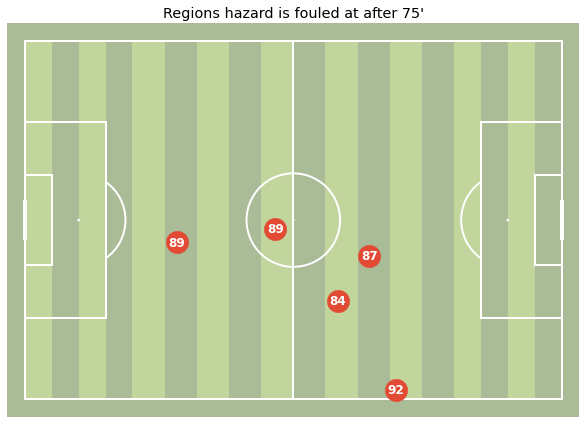

In [35]:
pitch = Pitch(pitch_type='statsbomb',figsize=(10,6),pitch_color='#aabb97', line_color='white',stripe_color='#c2d59d', stripe=True)
fig,ax = pitch.draw()
pitch.scatter(x="X_loc",y="y_loc",data=haz_foul,ax=ax,s=500)
for i in range(0,5):
    ax.annotate(str(haz_foul["minute"].to_list()[i]),  xy=(haz_foul["X_loc"].to_list()[i],haz_foul["y_loc"].to_list()[i]), color='white',
                fontsize="large", weight='heavy',
                horizontalalignment='center',
                verticalalignment='center')
    plt.title("Regions hazard is fouled at after 75'")

In [36]:
#Also checking the dribbles hazard has after the brazil goal

In [37]:
drib=haz[(haz["type.name"]=="Dribble") & (haz["minute"]> 75)].index.to_list()

In [38]:
for i in range(0,len(drib)):
    drib[i]=drib[i]+1

In [39]:
hazdrib=haz.loc[drib][["X_loc","y_loc","minute","type.name","carry.end_location","cend_x","cend_y"]]

In [40]:
hazdrib

,X_loc,y_loc,minute,type.name,carry.end_location,cend_x,cend_y
3094,23.0,50.0,79,Carry,"[90.0, 48.0]",90.0,48.0
3241,68.0,62.0,84,Carry,"[70.0, 58.0]",70.0,58.0
3392,35.0,48.0,89,Carry,"[56.0, 42.0]",56.0,42.0
3514,50.0,75.0,91,Carry,"[58.0, 54.0]",58.0,54.0
3517,58.0,54.0,91,Carry,"[83.0, 78.0]",83.0,78.0


Text(0.5, 1.0, "Hazards Dribbles after 75'")

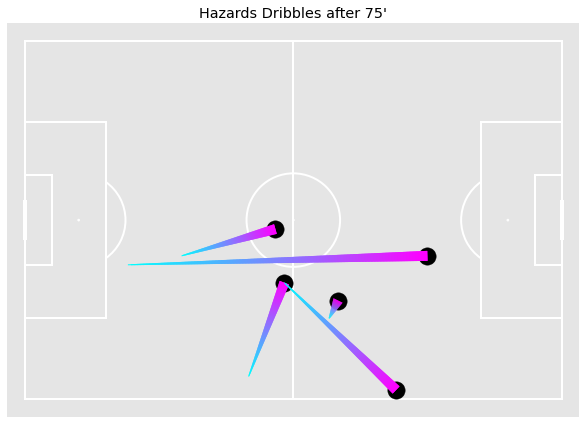

In [41]:
pitch = Pitch(pitch_type='statsbomb',figsize=(10,6))
fig,ax = pitch.draw()
pitch.lines(hazdrib.X_loc,hazdrib.y_loc,hazdrib.cend_x,hazdrib.cend_y,
            lw=10, ax=ax,comet=True, cmap='cool')
pitch.scatter(x="cend_x",y="cend_y",data=hazdrib,ax=ax,s=300,c="black")
plt.title("Hazards Dribbles after 75'")


In [42]:
#Intrestingly the end location of some of the dribbles seems to match wid the fouls 

In [43]:
#hazard also acted as the third wheel in the red devils attack 
#he supported de bruyne and lukaku in attack and was lively throughout the game 

#lets check his completed passes(forward) in the final third of the pitch 

In [44]:
hazpas=haz[(haz["type.name"]=="Pass") & (haz["X_loc"]>80) & ((haz["pend_x"]-haz["X_loc"])>0) & 
           (haz["pass.outcome.name"]!="Incomplete")]

In [45]:
hazpas[["X_loc","y_loc","minute","type.name","pend_x","pend_y"]]

,X_loc,y_loc,minute,type.name,pend_x,pend_y
869,94.0,52.0,20,Pass,113.0,55.0
1072,84.0,25.0,25,Pass,101.0,20.0
1255,90.0,10.0,33,Pass,95.0,18.0
1428,92.0,27.0,37,Pass,95.0,42.0
2599,83.0,16.0,63,Pass,87.0,4.0
2666,91.0,5.0,64,Pass,97.0,14.0
3569,89.0,63.0,94,Pass,105.0,78.0


Text(0.5, 1.0, 'Hazards final third passes')

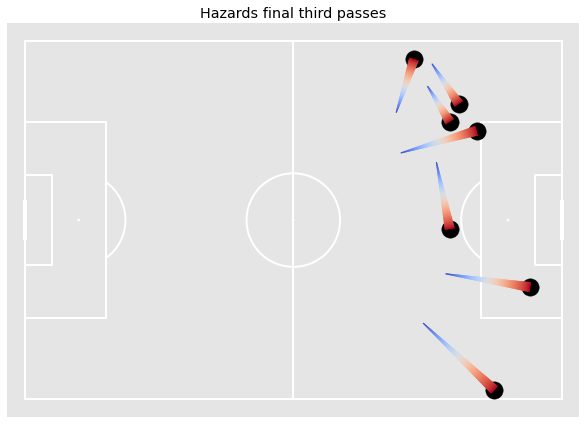

In [46]:
pitch = Pitch(pitch_type='statsbomb',figsize=(10,6))
fig,ax = pitch.draw()
pitch.lines(hazpas.X_loc,hazpas.y_loc,hazpas.pend_x,hazpas.pend_y,
            lw=10, ax=ax,comet=True, cmap='coolwarm',label='passes in the final third')
pitch.scatter(x="pend_x",y="pend_y",data=hazpas,ax=ax,s=300,c="black",label="")
plt.title("Hazards final third passes")

In [71]:
haz[haz["type.name"]=="Shot"]

,id,index,period,timestamp,minute,second,possession,duration,type.id,type.name,...,50_50.outcome.name,ball_recovery.offensive,shot.deflected,shot.redirect,X_loc,pend_x,cend_x,pend_y,cend_y,y_loc
324,6d0270c0-744d-4421-8e46-26f5e8a22475,325,1,00:07:32.580,7,32,16,0.173,16,Shot,...,NaN,NaN,NaN,NaN,106.0,NaN,NaN,NaN,NaN,31.0
2497,551e5d4b-d633-4146-bc97-08c7f4348a8e,2498,2,00:16:15.787,61,15,114,1.013,16,Shot,...,NaN,NaN,NaN,NaN,108.0,NaN,NaN,NaN,NaN,27.0


In [57]:
ney=brabel[brabel["player.name"]=="Neymar da Silva Santos Junior"]

In [72]:
ney[ney["type.name"]=="Shot"]

,id,index,period,timestamp,minute,second,possession,duration,type.id,type.name,...,injury_stoppage.in_chain,pass.cut_back,foul_committed.penalty,foul_won.penalty,block.save_block,50_50.outcome.id,50_50.outcome.name,ball_recovery.offensive,shot.deflected,shot.redirect
1199,8fbe9f93-04ae-4be6-97ff-297e3c3fd4b4,1200,1,00:29:35.420,29,35,59,0.16,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2958,dc3efc2e-b051-46d1-bb4f-6982d883ffef,2959,2,00:29:28.867,74,28,149,0.82,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3558,cf017a4e-d5c5-4814-80d6-5146f044e551,3559,2,00:48:14.627,93,14,179,0.88,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
x1=[106,108]
y1=[31,27]

In [62]:
x2=[96,108,98]
y2=[20,45,39]

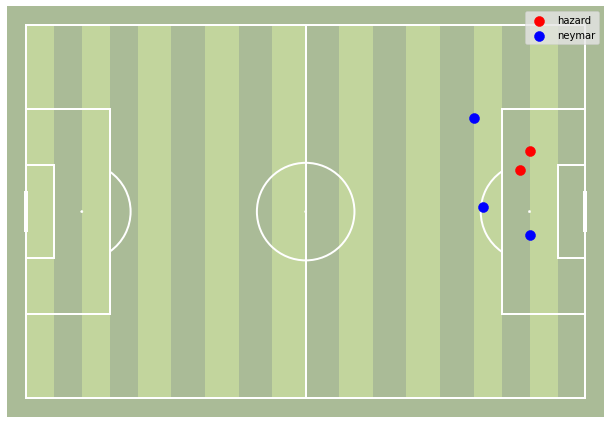

In [70]:
pitch = Pitch(pitch_type='statsbomb',figsize=(10,6),pitch_color='#aabb97', line_color='white',stripe_color='#c2d59d', stripe=True)
fig,ax = pitch.draw()
pitch.scatter(x1,y1,ax=ax,s=100,color="red",label="hazard")
pitch.scatter(x2,y2,ax=ax,s=100,color="blue",label="neymar")
plt.legend()